# Plotter Notebook

This is a notebook for generating all the plots I am using for poster and proceedings figures. 

In [1]:
# startup
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
%matplotlib inline
import babysmurf as bs

In [2]:
plt.rc('font', size=14) #controls default text size
plt.rc('axes', titlesize=24) #fontsize of the title
plt.rc('axes', labelsize=18) #fontsize of the x and y labels
plt.rc('xtick', labelsize=14) #fontsize of the x tick labels
plt.rc('ytick', labelsize=14) #fontsize of the y tick labels
plt.rc('legend', fontsize=14) #fontsize of the legend

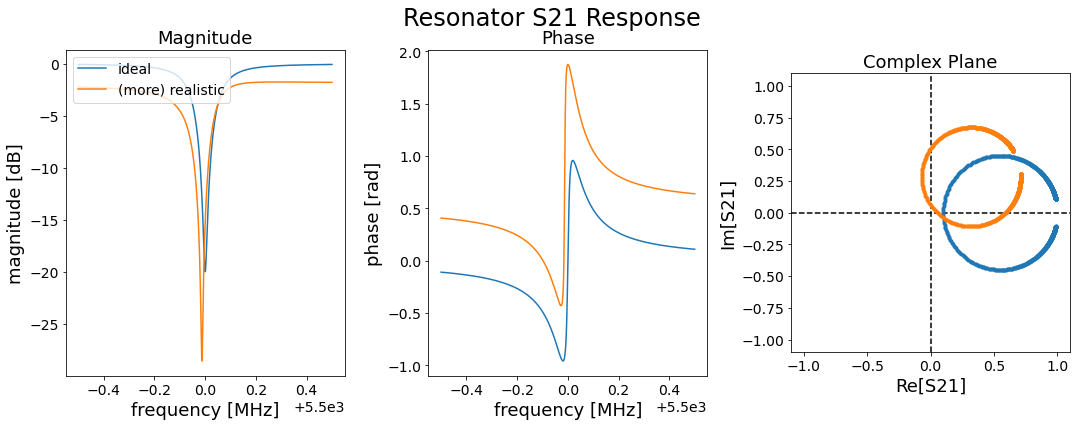

In [3]:
# define resonator parameters similar to typical umux100k chips from NIST
fres = 5.5e9 # 5.5GHz
Qtot = 4.5e4 # aim for bandwidth of 100kHz
Qc = 5.e4 # all real for now, not asymmetric

fvec = np.linspace(fres-500.e3,fres+500.e3,int(1e3)) # 1kHz spacing on fvec

a,p = bs.make_res_s21(fres,fvec,Qtot,Qc)

delay = 30 # degrees
scalefac = 0.8
a2,p2 = bs.make_res_s21(fres,fvec,Qtot,Qc*0.9+10.e3j) # make slightly asymmetric
p2 = np.deg2rad(delay) + p2
a2 = scalefac * a2 # multiplication by scale factor in amplitude equivalent to shifting up/down in logmag space

fig,ax = plt.subplots(1,3,figsize=(18,6))

ax[0].plot(fvec*1e-6,20*np.log10(a),label='ideal')
ax[0].plot(fvec*1e-6,20*np.log10(a2),label='(more) realistic')
ax[0].set_xlabel('frequency [MHz]')
ax[0].set_ylabel('magnitude [dB]')
ax[0].legend(loc = 'upper left')
ax[0].set_title('Magnitude',fontsize=18)

ax[1].plot(fvec*1e-6,p,label='ideal')
ax[1].plot(fvec*1e-6,p2,label='(more) realistic')
ax[1].set_xlabel('frequency [MHz]')
ax[1].set_ylabel('phase [rad]')
ax[1].set_title('Phase',fontsize=18)

# get sin,cos components
ivec = a*np.cos(p)
qvec = a*np.sin(p)
ivec2 = a2*np.cos(p2)
qvec2 = a2*np.sin(p2)
ax[2].plot(ivec,qvec,'.',label='ideal')
ax[2].plot(ivec2,qvec2,'.',label='(more) realistic')
ax[2].vlines(0,-1.1,1.1,'black','--')
ax[2].hlines(0,-1.1,1.1,'black','--')
ax[2].set_xlim([-1.1,1.1])
ax[2].set_ylim([-1.1,1.1])
ax[2].set_xlabel('Re[S21]')
ax[2].set_ylabel('Im[S21]')
ax[2].set_aspect('equal')
ax[2].set_title('Complex Plane',fontsize=18)

plt.suptitle(r'Resonator S21 Response',fontsize=24)
plt.subplots_adjust(wspace=0.3)
plt.savefig('plots/res_s21_resp.png',bbox_inches='tight',dpi=600)
plt.savefig('plots/res_s21_resp.svg',bbox_inches='tight')

<ipython-input-4-6c1fa5451ef6>:17: UserWarning: The handle <matplotlib.lines.Line2D object at 0x2b7102de14c0> has a label of '_' which cannot be automatically added to the legend.
  ax[0].legend(['_','minimum transmission','probe tone'],loc = 'upper left')


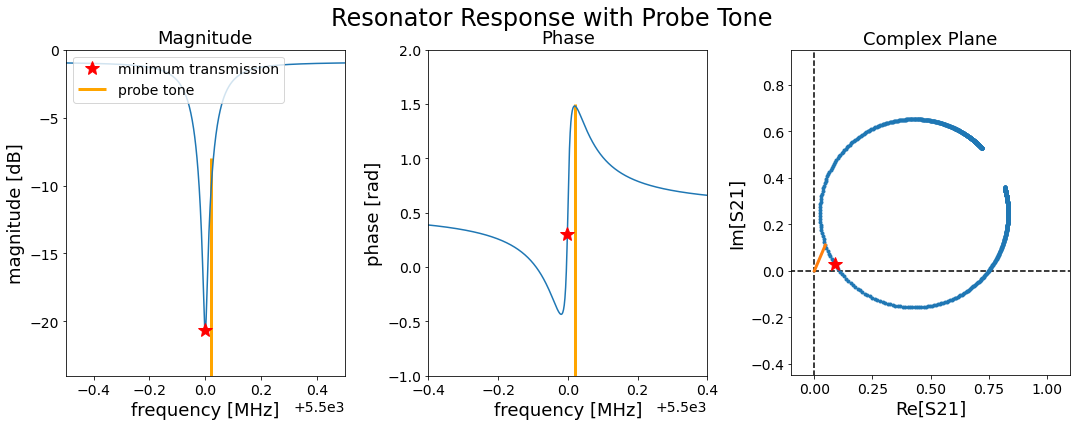

In [4]:
# draw probe tones
delay = 30 # degrees
scalefac = 0.9
a2,p2 = bs.make_res_s21(fres,fvec,Qtot,Qc+0.e3j) # make slightly asymmetric
p2 = np.deg2rad(delay) + p2
a2 = scalefac * a2 # multiplication by scale factor in amplitude equivalent to shifting up/down in logmag space

fig,ax = plt.subplots(1,3,figsize=(18,6))

ax[0].plot(fvec*1e-6,20*np.log10(a2))
ax[0].vlines((5.5e9 + 20.e3)*1.e-6,-25,-8,'orange',linewidth=3)
ax[0].set_xlabel('frequency [MHz]')
ax[0].set_ylabel('magnitude [dB]')
ax[0].set_ylim([-24,0])
ax[0].set_xlim([5.5e3 - 0.5,5.5e3 + 0.5])
ax[0].plot(fvec[498]*1e-6,20*np.log10(a2[498]),'r*',markersize=15)
ax[0].legend(['_','minimum transmission','probe tone'],loc = 'upper left')
ax[0].set_title('Magnitude',fontsize=18)

ax[1].plot(fvec*1e-6,p2)
ax[1].vlines((5.5e9 + 20.e3)*1.e-6,-3,1.5,'orange',linewidth=3)
ax[1].plot(fvec[498]*1e-6,p2[498],'r*',markersize=15)
ax[1].set_xlabel('frequency [MHz]')
ax[1].set_ylabel('phase [rad]')
ax[1].set_ylim([-1,2])
ax[1].set_xlim([5.5e3 - 0.4,5.5e3 + 0.4])
ax[1].set_title('Phase',fontsize=18)

# get sin,cos components
ivec2 = a2*np.cos(p2)
qvec2 = a2*np.sin(p2)
ax[2].plot(ivec2,qvec2,'.')
ax[2].plot(ivec2[498],qvec2[498],'r*',markersize=15)
ax[2].plot([0,ivec2[505]],[0,qvec2[505]],linewidth=3)
ax[2].vlines(0,-1.1,1.1,'black','--')
ax[2].hlines(0,-1.1,1.1,'black','--')
ax[2].set_xlim([-0.1,1.1])
ax[2].set_ylim([-0.45,0.95])
ax[2].set_xlabel('Re[S21]')
ax[2].set_ylabel('Im[S21]')
#ax[2].set_ylim([-0.8,1])
ax[2].set_aspect('equal')
ax[2].set_title('Complex Plane',fontsize=18)


plt.suptitle(r'Resonator Response with Probe Tone',fontsize=24)
plt.subplots_adjust(wspace=0.3)
plt.savefig('plots/res_s21_resp_probetone.png',bbox_inches='tight',dpi=600)
plt.savefig('plots/res_s21_resp_probetone.svg',bbox_inches='tight')

(-67033.65278999493-65287.71011978859j)


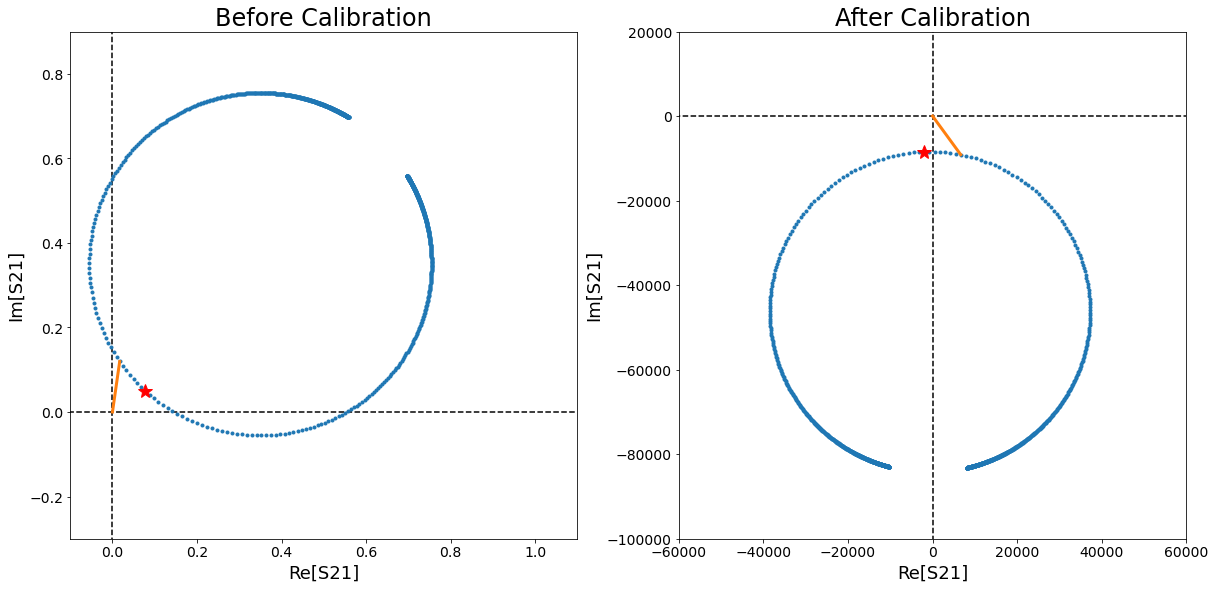

In [5]:
delay = 45 # degrees
scalefac = 0.9
a2,p2 = bs.make_res_s21(fres,fvec,Qtot,Qc) # make slightly asymmetric
p2 = np.deg2rad(delay) + p2
a2 = scalefac * a2 # multiplication by scale factor in amplitude equivalent to shifting up/down in logmag space

eta = bs.estimate_eta(fvec,a2,p2)
#eta = eta / np.abs(eta)
print(eta)
fig,ax = plt.subplots(1,2,figsize=(20,10))

ivec2 = a2*np.cos(p2)
qvec2 = a2*np.sin(p2)


#ax[0].plot(s21.real,s21.imag,'.')
ax[0].plot(ivec2,qvec2,'.')
ax[0].plot(ivec2[498],qvec2[498],'r*',markersize=15)
ax[0].plot([0,ivec2[505]],[0,qvec2[505]],linewidth=3)
ax[0].vlines(0,-1.1,1.1,'black','--')
ax[0].hlines(0,-1.1,1.1,'black','--')
ax[0].set_xlim([-0.1,1.1])
ax[0].set_ylim([-0.3,0.9])
ax[0].set_xlabel('Re[S21]')
ax[0].set_ylabel('Im[S21]')
#ax[2].set_ylim([-0.8,1])
ax[0].set_aspect('equal')
ax[0].set_title('Before Calibration')

s21 = a2 * np.exp(1j*p2)
s21_new = s21 * eta
ivec3 = np.real(s21_new)
qvec3 = np.imag(s21_new)

ax[1].plot(ivec3,qvec3,'.')
ax[1].plot(ivec3[498],qvec3[498],'r*',markersize=15)
ax[1].plot([0,ivec3[505]],[0,qvec3[505]],linewidth=3)
ax[1].vlines(0,-1.1e5,1.1e5,'black','--')
ax[1].hlines(0,-1.1e5,1.1e5,'black','--')
ax[1].set_ylim([-100000,20000])
ax[1].set_xlim([-60000,60000])
ax[1].set_xlabel('Re[S21]')
ax[1].set_ylabel('Im[S21]')
ax[1].set_aspect('equal')
ax[1].set_title('After Calibration')

#plt.suptitle(r'Before and After Calibration',fontsize=24)
#plt.subplots_adjust(wspace=0.3)
plt.savefig('plots/eta_applied.png',bbox_inches='tight',dpi=600)
plt.savefig('plots/eta_applied.svg',bbox_inches='tight')

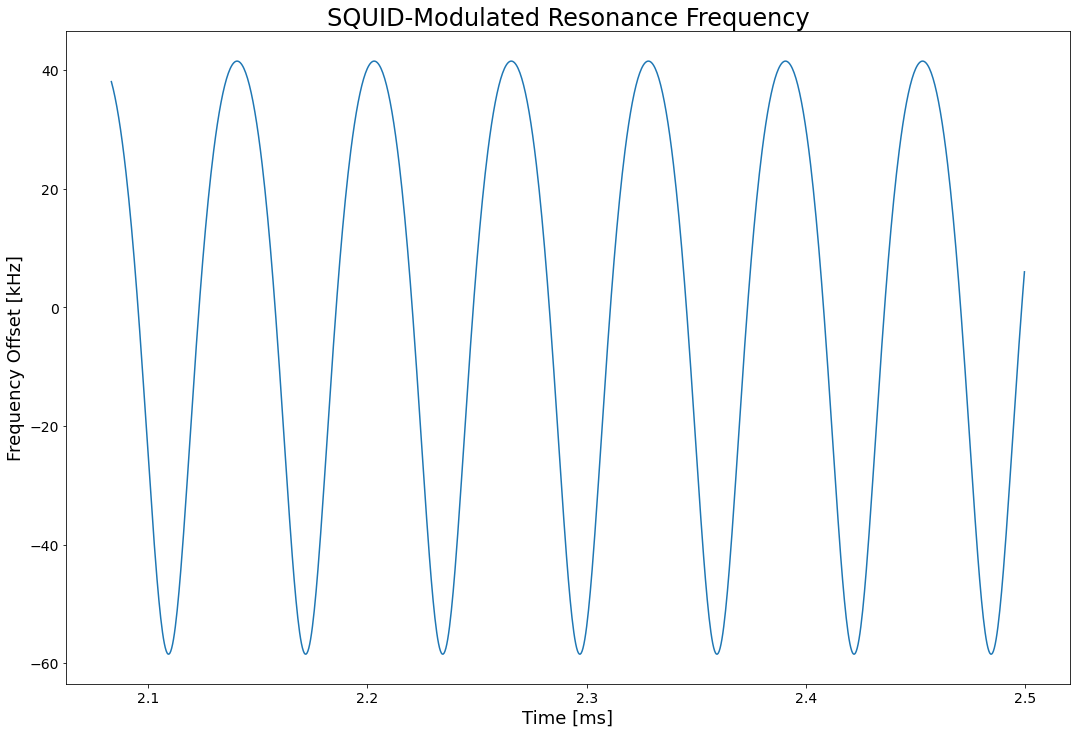

In [6]:
fsig = 0.5 # 0.5 Hz signal
tvec = np.linspace(0,1,100) # create 1 second of data
sig = np.sin(2 * np.pi * (1/fsig) * tvec)
scalefac = 0.1
scaledsig = scalefac * sig
squid = bs.make_squid_curve(0.33,100.e3,npts=6000) # lambda = 0.33, 100kHz peak to peak frequency swing


m,t,ph = bs.make_measured_signal(tvec,scaledsig,squid,reset_rate=4.e3) # take nphi0=4, fsamp = 2.4MHz as defaults, but 4kHz reset rate as is common

# plot a subset of the output
fig,ax = plt.subplots(1,1,figsize=(18,12))
ax.plot(t[5000:6000] * 1e3,m[5000:6000] * 1e-3)
ax.set_xlabel('Time [ms]')
ax.set_ylabel('Frequency Offset [kHz]')
ax.set_title('SQUID-Modulated Resonance Frequency')
plt.savefig('plots/example_fres.png',bbox_inches='tight',dpi=600)
plt.savefig('plots/example_fres.svg',bbox_inches='tight')

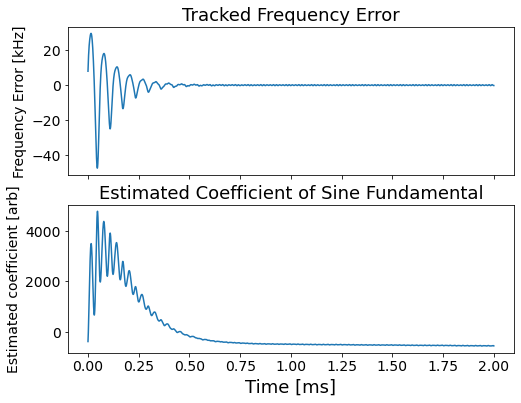

In [7]:
d,p,y,e,a = bs.lms_fit_demod_meas(m[:4800],reset_rate=4.e3)
# examine outputs

# d = demodulated phase, sampled at FR reset rate
# p = estimated phases, sampled at full digitizer rate
# y = estimated frequency, sampled at full digitizer rate
# e = errors, sampled at full digitizer rate
# a = alphas, sampled at full digitizer rate

#tt = np.linspace(0,1,len(d))
fig,ax = plt.subplots(2,1,figsize=(8,6),sharex=True)
ax[0].plot(t[:4800]*1e3,(e - np.mean(e))*1e-3)
#ax[0].set_xlabel('Time [ms]')
ax[0].set_ylabel('Frequency Error [kHz]',fontsize=14)
ax[0].set_title('Tracked Frequency Error',fontsize=18)

ax[1].plot(t[:4800]*1e3,a[:,0] - np.mean(a[:,0]))
ax[1].set_xlabel('Time [ms]')
ax[1].set_ylabel('Estimated coefficient [arb]',fontsize=14)
ax[1].set_title('Estimated Coefficient of Sine Fundamental',fontsize=18)

plt.savefig('plots/example_lms.png',bbox_inches='tight',dpi=600)
plt.savefig('plots/example_lms.svg',bbox_inches='tight')

In [8]:
#gains = [1/1024, 1/256, 1/32, 1/8, 1/2]
gains = [10,8,5,3,1,-1]
#gains = [1/8]
darray = np.zeros((4000,len(gains)))
for idx,g in enumerate(gains):
    print(idx)
    dd,_,_,_,_ = bs.lms_fit_demod_meas(m,reset_rate=4.e3,gain=2**(-1*g))
    darray[:,idx] = np.ravel(dd)

0
1
2
3
4
5


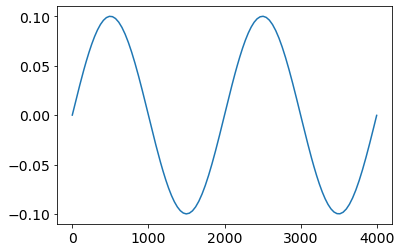

In [9]:
plt.plot(ph-np.mean(ph))

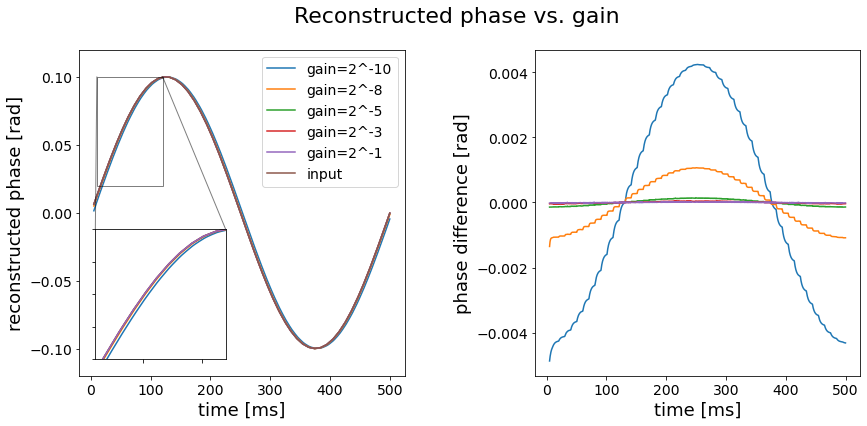

In [10]:
start=20
stop=2000

tt = np.linspace(0,1,len(dd))
fig,ax = plt.subplots(1,2,figsize=(14,6))
axin1 = ax[0].inset_axes([0.05, 0.05, 0.4, 0.4])
for idx,g in enumerate(gains[:-1]):
    ax[0].plot(tt[start:stop]*1e3,darray[start:stop,idx]-np.mean(darray[start:stop,idx]),label=f"gain=2^-{g}")
    axin1.plot(tt[start:stop]*1e3,darray[start:stop,idx]-np.mean(darray[start:stop,idx]))
ax[0].plot(tt[start:stop]*1e3,ph[start:stop]-np.mean(ph[start:stop]),label='input')
ax[0].set_ylim([-0.12,0.12])
ax[0].set_xlabel('time [ms]')
ax[0].set_ylabel('reconstructed phase [rad]')
ax[0].legend(loc="upper right")

axin1.set_xlim(10, 120)
axin1.set_ylim(0.02,0.10)
axin1.set_xticklabels([])
axin1.set_yticklabels([])

ax[0].indicate_inset_zoom(axin1, edgecolor="black")
#ax[0].set_title('Reconstructed phase - input vs. gain')

for idx,g in enumerate(gains[:-1]):
    ax[1].plot(tt[start:stop]*1e3,(darray[start:stop,idx]-np.mean(darray[start:stop,idx])-ph[start:stop]+np.mean(ph[start:stop])),label=f"gain=2^-{g}")
#ax[1].plot(tt[20:50]*1e3,ph[20:50]-np.mean(ph[20:50]),label='input')
ax[1].set_xlabel('time [ms]')
ax[1].set_ylabel('phase difference [rad]')
plt.subplots_adjust(wspace=0.4)

plt.suptitle('Reconstructed phase vs. gain',fontsize=22)
plt.savefig('plots/example_gain.png',bbox_inches='tight',dpi=600)
plt.savefig('plots/example_gain.svg',bbox_inches='tight')